Predictions: [1 1 0 0]


C:\Users\MD RAHATUL RABBI\AppData\Local\Temp\ipykernel_5384\1090242567.py:47: RuntimeWarning: divide by zero encountered in divide
  y_boundary = -(self.weights[0] * x_boundary - self.threshold) / self.weights[1]


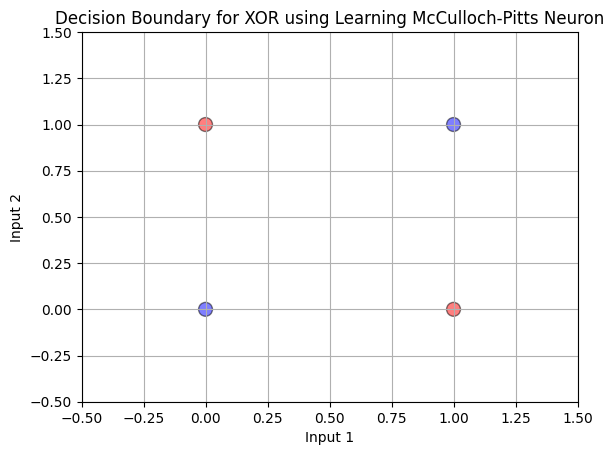

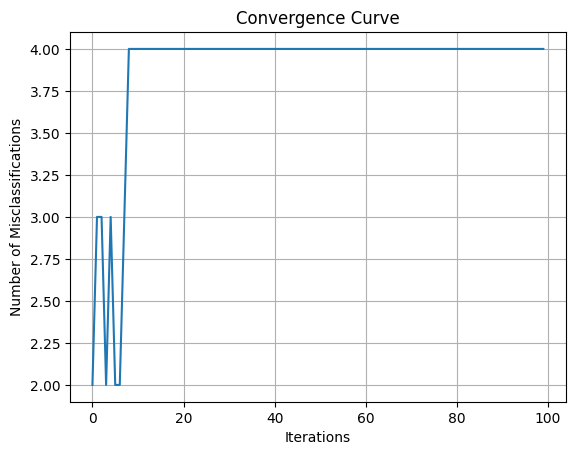

In [1]:

import numpy as np
import matplotlib.pyplot as plt

class McCullochPittsNeuron:
    def __init__(self, weights, threshold):
        self.weights = weights
        self.threshold = threshold

    def activate(self, inputs):
        # Calculate the weighted sum
        weighted_sum = np.dot(inputs, self.weights)
        # Apply threshold
        return 1 if weighted_sum >= self.threshold else 0

class LearningMcCullochPitts:
    def __init__(self, learning_rate=0.1, n_iters=100):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = np.array([0.0, 0.0])  # Initialize weights
        self.threshold = 0.5  # Initialize threshold
        self.errors = []  # To store the number of misclassifications

    def fit(self, X, y):
        for _ in range(self.n_iters):
            error_count = 0
            for idx, x_i in enumerate(X):
                # Calculate the weighted sum
                weighted_sum = np.dot(x_i, self.weights)
                # Apply threshold to get prediction
                y_predicted = 1 if weighted_sum >= self.threshold else 0

                # Update weights and threshold if prediction is incorrect
                if y[idx] != y_predicted:
                    error_count += 1
                    self.weights += self.learning_rate * (y[idx] - y_predicted) * x_i
                    self.threshold -= self.learning_rate * (y[idx] - y_predicted)  # Update threshold

            self.errors.append(error_count)  # Store the number of misclassifications

    def predict(self, X):
        weighted_sum = np.dot(X, self.weights)
        return np.array([1 if i >= self.threshold else 0 for i in weighted_sum])

    def plot_decision_boundary(self, X, y):
        plt.scatter(X[:, 0], X[:, 1], c=y, s=100, alpha=0.5, cmap='bwr', edgecolors='k')
        x_boundary = np.linspace(-0.5, 1.5, 100)
        y_boundary = -(self.weights[0] * x_boundary - self.threshold) / self.weights[1]
        plt.plot(x_boundary, y_boundary, 'k--')
        plt.xlim(-0.5, 1.5)
        plt.ylim(-0.5, 1.5)
        plt.xlabel('Input 1')
        plt.ylabel('Input 2')
        plt.title('Decision Boundary for XOR using Learning McCulloch-Pitts Neuron')
        plt.grid()
        plt.show()

# Define the input for XOR
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# Expected output for XOR function
y = np.array([0, 1, 1, 0])  # Output: (0, 1, 1, 0)

# Create an instance of the learning McCulloch-Pitts neuron
neuron = LearningMcCullochPitts(learning_rate=0.1, n_iters=100)

# Train the neuron
neuron.fit(X, y)

# Test the neuron
y_pred = neuron.predict(X)
print("Predictions:", y_pred)

# Plotting Decision Boundary
neuron.plot_decision_boundary(X, y)

# Plot the convergence curve
plt.plot(neuron.errors)
plt.title('Convergence Curve')
plt.xlabel('Iterations')
plt.ylabel('Number of Misclassifications')
plt.grid()
plt.show()